In [2]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).


## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [3]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [4]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


# Overall distance travelled, average speed and total time used for each of the rides

In [31]:
# insert new 'overall distance' to each ride
rr_2016['overall_distance'] = rr_2016['distance'].cumsum()
print(rr_2016['overall_distance'].iloc[-1])

rr_2019['overall_distance'] = rr_2019['distance'].cumsum()
print(rr_2019['overall_distance'].iloc[-1])

tt_2016['overall_distance'] = tt_2016['distance'].cumsum()
print(tt_2016['overall_distance'].iloc[-1])

tt_2019['overall_distance'] = tt_2019['distance'].cumsum()
print(tt_2019['overall_distance'].iloc[-1])

49.04858574628641
51.78913253596059
24.8028870313081
24.38014504376576


In [21]:
# insert new 'total time' to each ride
rr_2016['total_time'] = rr_2016['timedelta'].cumsum()
print(rr_2016['total_time'].iloc[-1])

rr_2019['total_time'] = rr_2019['timedelta'].cumsum()
print(rr_2019['total_time'].iloc[-1])

tt_2016['total_time'] = tt_2016['timedelta'].cumsum()
print(tt_2016['total_time'].iloc[-1])

tt_2019['total_time'] = tt_2019['timedelta'].cumsum()
print(tt_2019['total_time'].iloc[-1])

5200.0
5502.0
2747.0
2654.0


In [34]:
# Shape of table for each ride
print(rr_2016.shape)
print(rr_2019.shape)
print(tt_2016.shape)
print(tt_2019.shape)

(2822, 13)
(5503, 13)
(1541, 13)
(2655, 13)


The formula of speed is $Speed = \frac{Distance}{Time}$

34.93308475482947
33.87986137188044
33.52996304869014
33.05782378815691


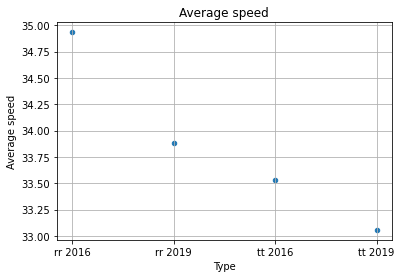

In [96]:
# Average speed for each ride
rr_2016_average_speed = rr_2016['speed'].mean()
print(rr_2016_average_speed)

rr_2019_average_speed = rr_2019['speed'].mean()
print(rr_2019_average_speed)

tt_2016_average_speed = tt_2016['speed'].mean()
print(tt_2016_average_speed)

tt_2019_average_speed = tt_2019['speed'].mean()
print(tt_2019_average_speed)

Aves = pd.DataFrame({'Type':['rr 2016', 'rr 2019', 'tt 2016', 'tt 2019'], 'Average speed':[rr_2016['speed'].mean(), rr_2019['speed'].mean(), tt_2016['speed'].mean(), tt_2019['speed'].mean()]})
Avesg = Aves.plot.scatter(x='Type', y='Average speed', grid = True, title = 'Average speed')

The overall distance for road races 2016 and 2019 were 49km and 51.8km respectively. Moreover, overall distance for time trail in 2016 was 24.8km and 24.4km in 2019. For the total time used in road ride 2016, road ride 2019, time trail 2016 and time trail 2019 were 5200s, 5502s, 2747s and 2654s respectively. Althought the overall distance were vary, the time elimated the difference between distance. Therefore the average speed of road race in 2016 was 34.93308475482947km/h, road race in 2019 was 33.87986137188044km/h, time trail in 2016 was 33.52996304869014km/h and time trail in 2019 was 33.05782378815691km/h.



# Range of speeds for each ride

The range of speed for road race in 2016 was between 0.0km/h and 92.74903649913952km/h.


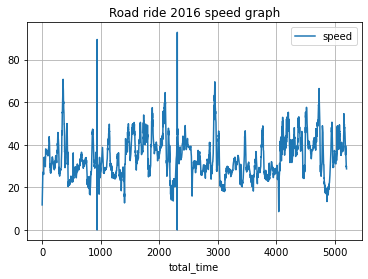

In [36]:
rr_2016.plot(x='total_time', y='speed', grid=True, title='Road ride 2016 speed graph')
rr_2016_min = rr_2016['speed'].min()
rr_2016_max = rr_2016['speed'].max()
print(f"The range of speed for road race in 2016 was between {rr_2016_min}km/h and {rr_2016_max}km/h.")

The range of speed for road race in 2019 was between 0.0km/h and 70.37046868335639km/h.


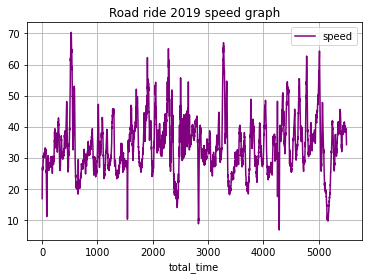

In [86]:
rr_2019.plot(x='total_time', y='speed', grid=True, color = 'purple', title='Road ride 2019 speed graph')
rr_2019_min = rr_2019['speed'].min()
rr_2019_max = rr_2019['speed'].max()
print(f"The range of speed for road race in 2019 was between {rr_2019_min}km/h and {rr_2019_max}km/h.")


The range of speed for time trail in 2016 was between 0.0km/h and 162.50576377606754km/h.


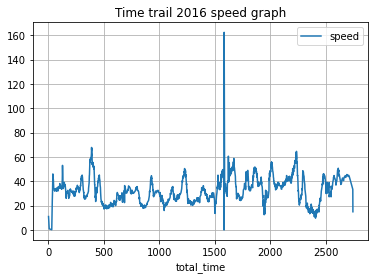

In [38]:
tt_2016.plot(x='total_time', y='speed', grid=True, title='Time trail 2016 speed graph')
tt_2016_min = tt_2016['speed'].min()
tt_2016_max = tt_2016['speed'].max()
print(f"The range of speed for time trail in 2016 was between {tt_2016_min}km/h and {tt_2016_max}km/h.")

The range of speed for time trail in 2019 was between 0.0km/h and 63.300734121945005km/h.


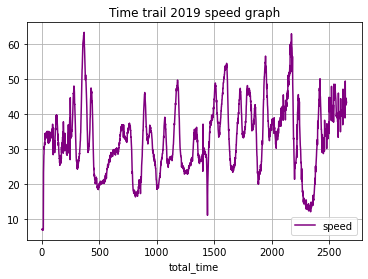

In [84]:
tt_2019.plot(x='total_time', y='speed', grid=True, color = 'purple', title='Time trail 2019 speed graph')
tt_2019_min = tt_2019['speed'].min()
tt_2019_max = tt_2019['speed'].max()
print(f"The range of speed for time trail in 2019 was between {tt_2019_min}km/h and {tt_2019_max}km/h.")

We can said that the time trail in 2016 had the biggest range of speed and it was the fastest among all four races. However, time trail in 2019 had the smallest range of speed compare to all other races. Road race in 2016 and 2019 lied between both time trail. In a nutshell, time trail in 2016 is faster than both road races, yet time trail in 2019 slower than both road races.

# Speeds achieved in the two time trials 

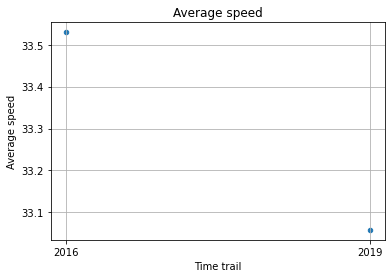

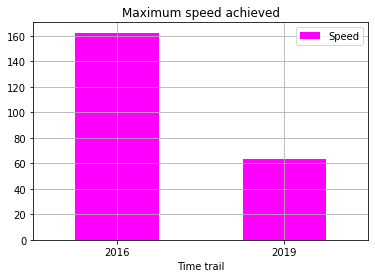

In [124]:
tt = pd.DataFrame({'Time trail':['2016', '2019'], 'Average speed':[tt_2016['speed'].mean(), tt_2019['speed'].mean()]})
ttg = tt.plot.scatter(x='Time trail', y='Average speed', rot=0, title = 'Average speed', colormap = 'hot', grid = True)
tt = pd.DataFrame({'Time trail':['2016', '2019'], 'Speed':[tt_2016['speed'].max(), tt_2019['speed'].max()]})
ttg = tt.plot.bar(x='Time trail', y='Speed', rot=0, title = 'Maximum speed achieved', colormap = 'spring', grid = True)

In [125]:
print(f"The average speed for time trail in 2016 was {tt_2016_average_speed}km/h and time trail in 2019 was {tt_2019_average_speed}km/h respectively.")
print("Therefore, we know that time trail in 2016 is slightly faster than time trail in 2019.")
print(f"The speed achieved for time trail in 2016 and 2019 were {tt_2016_max}km/h and {tt_2019_max}km/h respectively.")
print(f"Obviously, time trail in 2016 achieved the fastest speed which was {tt_2016_max}km/h among both.")


The average speed for time trail in 2016 was 33.52996304869014km/h and time trail in 2019 was 33.05782378815691km/h respectively.
Therefore, we know that time trail in 2016 is slightly faster than time trail in 2019.
The speed achieved for time trail in 2016 and 2019 were 162.50576377606754km/h and 63.300734121945005km/h respectively.
Obviously, time trail in 2016 achieved the fastest speed which was 162.50576377606754km/h among both.


# Average speed according to the elevation gain for each ride

The average speed for climbing in road ride 2016 was 26.671287040325574
The average speed for flat in road ride 2016 was 32.83847980393883
The average speed for descending in road ride 2016 was 49.825289708845965


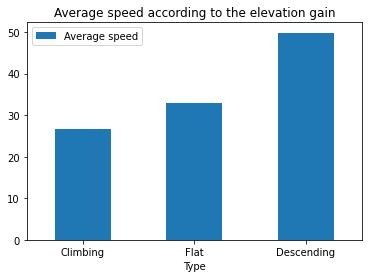

In [102]:
rr_2016_climbing = rr_2016[(rr_2016.elevation_gain >= 0.5)]
print(f"The average speed for climbing in road ride 2016 was {rr_2016_climbing['speed'].mean()}")
rr_2016_flat = rr_2016[(rr_2016.elevation_gain > -0.5) & (rr_2016.elevation_gain < 0.5)]
print(f"The average speed for flat in road ride 2016 was {rr_2016_flat['speed'].mean()}")
rr_2016_descending = rr_2016[(rr_2016.elevation_gain <= -0.5)]
print(f"The average speed for descending in road ride 2016 was {rr_2016_descending['speed'].mean()}")
rr16_as = pd.DataFrame({'Type':['Climbing', 'Flat', 'Descending'], 'Average speed':[rr_2016_climbing['speed'].mean(), rr_2016_flat['speed'].mean(), rr_2016_descending['speed'].mean()]})
rr16_asg = rr16_as.plot.bar(x='Type', y='Average speed', rot=0, title = 'Average speed according to the elevation gain')

The average speed for climbing in road ride 2019 was 29.935966338476447
The average speed for flat in road ride 2019 was 32.62731794137533
The average speed for descending in road ride 2019 was 50.3371461901728


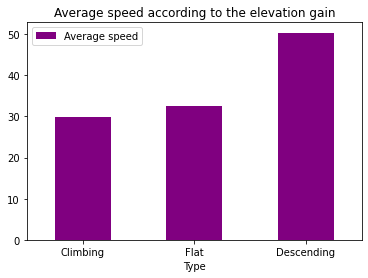

In [101]:
rr_2019_climbing = rr_2019[(rr_2019.elevation_gain >= 0.5)]
print(f"The average speed for climbing in road ride 2019 was {rr_2019_climbing['speed'].mean()}")
rr_2019_flat = rr_2019[(rr_2019.elevation_gain > -0.5) & (rr_2019.elevation_gain < 0.5)]
print(f"The average speed for flat in road ride 2019 was {rr_2019_flat['speed'].mean()}")
rr_2019_descending = rr_2019[(rr_2019.elevation_gain <= -0.5)]
print(f"The average speed for descending in road ride 2019 was {rr_2019_descending['speed'].mean()}")
rr19_as = pd.DataFrame({'Type':['Climbing', 'Flat', 'Descending'], 'Average speed':[rr_2019_climbing['speed'].mean(), rr_2019_flat['speed'].mean(), rr_2019_descending['speed'].mean()]})
rr19_asg = rr19_as.plot.bar(x='Type', y='Average speed', rot=0, color = 'purple', title = 'Average speed according to the elevation gain')

The average speed for climbing in time trail 2016 was 24.762251267727855
The average speed for flat in time trail 2016 was 31.532169858659525
The average speed for descending in time trail 2016 was 47.42583439200983


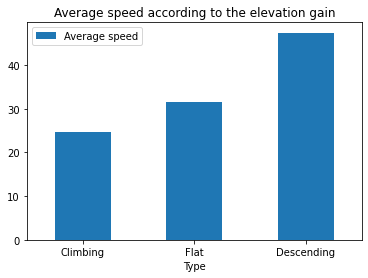

In [99]:
tt_2016_climbing = tt_2016[(tt_2016.elevation_gain >= 0.5)]
print(f"The average speed for climbing in time trail 2016 was {tt_2016_climbing['speed'].mean()}")
tt_2016_flat = tt_2016[(tt_2016.elevation_gain > -0.5) & (tt_2016.elevation_gain < 0.5)]
print(f"The average speed for flat in time trail 2016 was {tt_2016_flat['speed'].mean()}")
tt_2016_descending = tt_2016[(tt_2016.elevation_gain <= -0.5)]
print(f"The average speed for descending in time trail 2016 was {tt_2016_descending['speed'].mean()}")
tt16_as = pd.DataFrame({'Type':['Climbing', 'Flat', 'Descending'], 'Average speed':[tt_2016_climbing['speed'].mean(), tt_2016_flat['speed'].mean(), tt_2016_descending['speed'].mean()]})
tt16_asg = tt16_as.plot.bar(x='Type', y='Average speed', rot=0, title = 'Average speed according to the elevation gain')

The average speed for climbing in time trail 2019 was 29.387742319639052
The average speed for flat in time trail 2019 was 31.91382758843451
The average speed for descending in time trail 2019 was 51.39311413630681


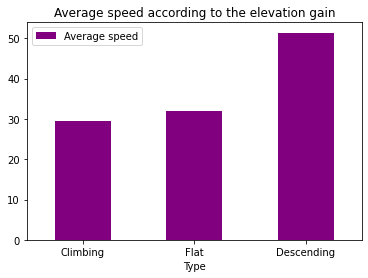

In [80]:
tt_2019_climbing = tt_2019[(tt_2019.elevation_gain >= 0.5)]
print(f"The average speed for climbing in time trail 2019 was {tt_2019_climbing['speed'].mean()}")
tt_2019_flat = tt_2019[(tt_2019.elevation_gain > -0.5) & (tt_2019.elevation_gain < 0.5)]
print(f"The average speed for flat in time trail 2019 was {tt_2019_flat['speed'].mean()}")
tt_2019_descending = tt_2019[(tt_2019.elevation_gain <= -0.5)]
print(f"The average speed for descending in time trail 2019 was {tt_2019_descending['speed'].mean()}")
tt19_as = pd.DataFrame({'Type':['Climbing', 'Flat', 'Descending'], 'Average speed':[tt_2019_climbing['speed'].mean(), tt_2019_flat['speed'].mean(), tt_2019_descending['speed'].mean()]})
tt19_asg = tt19_as.plot.bar(x='Type', y='Average speed', rot=0, color = 'purple', title = 'Average speed according to the elevation gain')

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





The formula of development/distance travelled is 
$Development = \frac{Distance}{Pedal revolution}$

$Speed = \frac{Distance}{Time}$ $km/h^{-1}$

$Speed = \frac{Distance}{Time}$ x $\frac{1000}{60}$ $m/min^{-1}$

$Speed = \frac{Distance}{Time}$ x $\frac{50}{3}$ $m/min^{-1}$

$Time$ = $\frac{Distance}{Speed}$ x $\frac{50}{3}$ $min$

$Cadence = \frac{Number of pedal rotation}{Time}$ $mins^{-1}$

$Cadence = \frac{Number of pedal rotation}{\frac{Distance}{Speed} x \frac{50}{3}}$

$Cadence = \frac{Number of pedal rotation}{\frac{50(Distance)}{3(Speed)}}$

$Cadence = \frac{Number of pedal rotation x 3(Speed)}{50(Distance)}$

$\frac{1}{Cadence}$ = $\frac{50(Distance)}{Number of pedal rotation x 3(Speed)}$

$\frac{3(Speed)}{Cadence}$ = $\frac{50(Distance)}{Number of pedal rotation}$

$\frac{3(Speed)}{50(Cadence)} = \frac{Distance}{Number of pedal rotation}$ $m$ = $Development$ #

From the calculation above, we figured out the relationship between development, speed and cadence. Other than that, we obtained a new formla to calculate development by using speed and cadence.

In [68]:
rr_2016.head(1050)

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta,development,total_time
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0,0.017666,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0,0.024563,5.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0,0.023175,8.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0,0.023018,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-14 04:34:45+00:00,-33.367193,151.228543,228.2,25.0,0.0,88.0,153.0,0.010522,0.0,37.878523,1.0,0.025826,1924.0
2016-05-14 04:34:46+00:00,-33.367288,151.228530,228.2,25.0,0.0,89.0,153.0,0.010632,0.0,38.276208,1.0,0.025804,1925.0
2016-05-14 04:34:52+00:00,-33.367884,151.228442,228.2,25.0,0.0,73.0,151.0,0.066774,0.0,40.064483,6.0,0.032930,1931.0
2016-05-14 04:34:54+00:00,-33.368071,151.228424,228.2,25.0,0.0,88.0,151.0,0.020861,0.0,37.548956,2.0,0.025602,1933.0


Calculate development aka distance travel for each revolution of the pedals. Use histogram.

In [41]:
rr_2016['development'] = (rr_2016['speed']*3)/(rr_2016['cadence']*50)

rr_2019['development'] = (rr_2019['speed']*3)/(rr_2019['cadence']*50)

tt_2016['development'] = (tt_2016['speed']*3)/(tt_2016['cadence']*50)

tt_2019['development'] = (tt_2019['speed']*3)/(tt_2019['cadence']*50)


In [52]:
rr_2016.replace([np.inf, -np.inf], np.nan, inplace=True)
rr_2016 = rr_2016.fillna(0)

rr_2019.replace([np.inf, -np.inf], np.nan, inplace=True)
rr_2019 = rr_2019.fillna(0)

tt_2016.replace([np.inf, -np.inf], np.nan, inplace=True)
tt_2016 = tt_2016.fillna(0)

tt_2019.replace([np.inf, -np.inf], np.nan, inplace=True)
tt_2019 = tt_2019.fillna(0)

array([[<AxesSubplot:title={'center':'development'}>]], dtype=object)

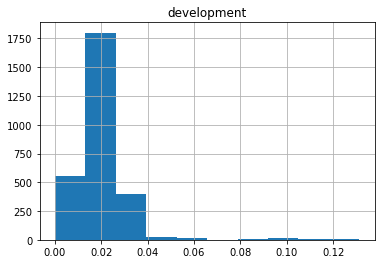

In [61]:
rr_2016.hist(column='development')

<AxesSubplot:xlabel='total_time'>

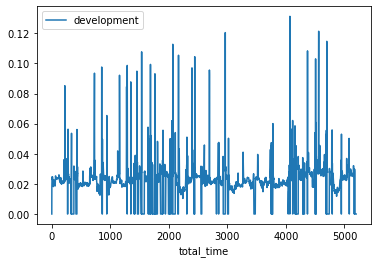

In [58]:
rr_2016.plot(y='development', x='total_time')

array([[<AxesSubplot:title={'center':'development'}>]], dtype=object)

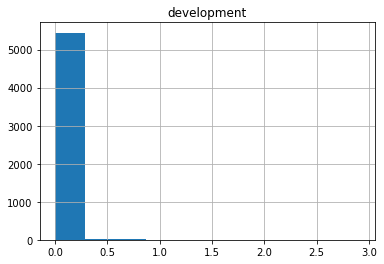

In [62]:
rr_2019.hist(column='development')

<AxesSubplot:xlabel='total_time'>

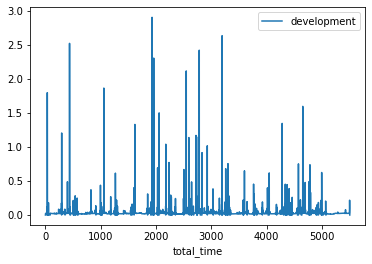

In [59]:
rr_2019.plot(y='development', x='total_time')

array([[<AxesSubplot:title={'center':'development'}>]], dtype=object)

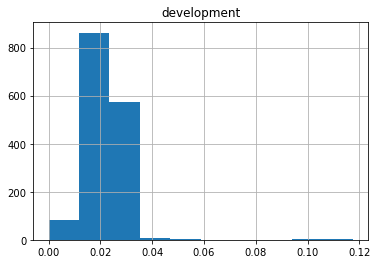

In [63]:
tt_2016.hist(column='development')

<AxesSubplot:xlabel='total_time'>

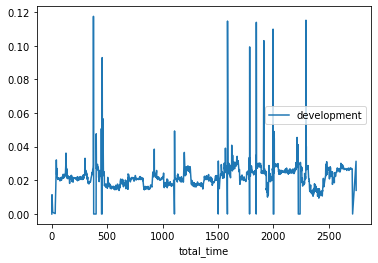

In [60]:
tt_2016.plot(y='development', x='total_time')

array([[<AxesSubplot:title={'center':'development'}>]], dtype=object)

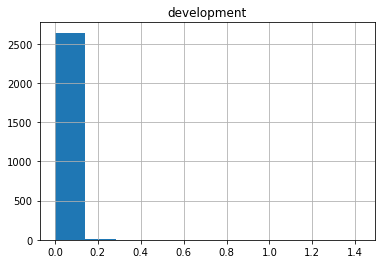

In [64]:
tt_2019.hist(column='development')

<AxesSubplot:xlabel='total_time'>

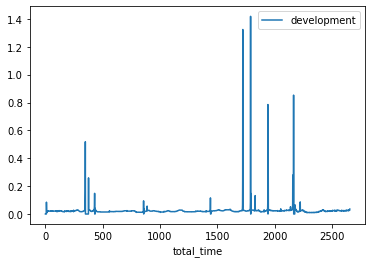

In [57]:
tt_2019.plot(y='development', x='total_time')

From the observation of histogram, we can say the development for road ride 2019 and time trail 2019 are very similar which started with high and ended with low development. FOr road race 2016 and time trail 2016 are kind of similar but slightly different. At x axis 0.3, time trail 2016 seems to has higher development compare to the road race 2016.

For the line graph, we observed road race 2016 constantly remain the development aroung 0.02 with a lower range of 0.12 development but road race 2019 development is constantly remain at around 0 with a higher range of 3.0 development compare to road race 2016. On the other hand, the highest development achieved by the rime trail 2016 and 2019 are 0.12 and 1.4. Time trail 2016 developments are constantly remain around 0.02 while time trail 2019 developments are constantly remain at 0.